# Taller 7

Bienvenidos al taller 7 del curso Astronomía en la Era de la Información, el segundo taller evaluado. Por favor, ingrese los nombres de los integrantes abajo

In [1]:
integrante1 = 'Simón'
integrante2 = 'Ángel'

El taller cuenta con 3 ejercicios breves. Léalos primero y desarróllelos en el orden que le parezca conveniente. Celdas en las que haya que completar código dicen "# Complete el código"; celdas donde tenga que escribir todo desde cero dicen "# Aquí va su código"; celdas que no dicen nada no tienen que ser modificadas.

Partamos cargando los paquetes de Python que usaremos. **Ejecute el siguiente bloque.**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

----
## Ejercicio 1
----

En este ejercicio usaremos el catalogo de galaxias del grupo local que utilizamos el taller anterior. Tiene pequeñas diferencias, como más detalles en el tipo de galaxias. Partiremos leyendo el catalogo del grupo local usando pandas y luego haremos una serie de graficos. Ejecute el siguiente bloque de codigo para cargar el catalogo.

In [3]:
cat_url='https://raw.githubusercontent.com/rpmunoz/PentaUC/master/Astronomia%20era%20informacion/data/catalogo_grupo_local.csv'
grupolocal=pd.read_csv(cat_url,header=0,sep=',')
grupolocal.head()

,nombre,l,b,distancia,diametro,tipo,desc
0,Via Lactea,0.0,0.0,0.00,27.59,SBbc,0
1,Sagittarius Dwarf,5.6,-14.1,23.91,6.13,dSph,1994
2,Ursa Major II,152.5,37.4,30.66,0.31,dSph,2006
3,Coma Berenices Dwarf,241.9,83.6,44.15,0.31,dSph,2006
4,Gran nube de Magallanes,280.5,-32.9,50.59,7.67,SBm,0


**Parte 1**

En el siguiente bloque debera hacer un histograma del año de descubrimiento de la galaxia. Use la columna 'desc' del catalogo grupolocal. **Usted deberá definir el numero de bines que le parezca óptimo, escribir su código en el siguiente bloque y responder la pregunta A.**

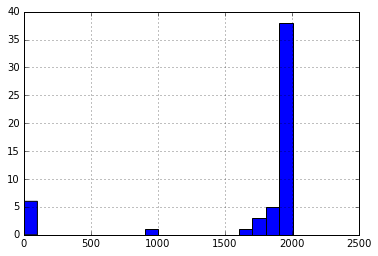

In [5]:
grupolocal['desc'].hist(bins=20)

**A)** Explique por qué la distribución tiene esta forma

**Respuesta:** Esto se debe a que hay varias galaxias que han sido observadas siempre por la humanidad, por lo que se les asigna año de descubrimiento en cero, como fue explicado en el taller seis. Luego vino el descubrimiento de Andrómeda cerca del año 1000, y luego las nuevas tecnologías permiten encontrar cada vez más galaxias en nuestro grupo.

**Parte 2**

En el siguiente bloque debera hacer un histograma de la distancia a la cual se encuentran las galaxias. Use la columna 'distancia' del catalogo grupolocal. **Usted deberá definir el numero de bines óptimo, escribir su código en el siguiente bloque y responder la pregunta B.**

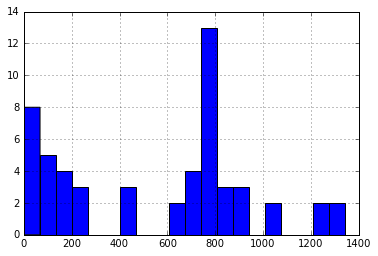

In [10]:
grupolocal['distancia'].hist(bins=20)

**B)** Explique por qué la distribución tiene esa forma, en particular a qué se deben los *peaks* (valores altos) de esta. Recuerde la materia vista la clase pasada sobre el grupo local

**Respuesta:** Muchas galaxias se encuentran cerca de nuestra galaxia (por eso se agrupan alrededor de distancia = 0) y cerca de Andrómeda, la otra galaxia "gigante" de nuestro grupo local (cerca de 800 mil años luz), por lo que la otra gran agrupación está alrededor de ésta.

**Parte 3**

En el siguiente bloque debera hacer un grafico con las posiciones en el cielo de las galaxias enanas esferoidales (el "nombre clave" de este tipo de galaxias es *dSph*) descubiertas antes del año 2000. Use las columnas 'l' y 'b' para graficar la posicion (coordenadas correspondientes a la longitud y latitud galactica), y las columnas 'tipo' y 'desc' para filtrar los elementos relevantes del catalogo. **Complete el siguiente código en los espacios donde aparecen los tres puntos (...) y responda la pregunta C.**

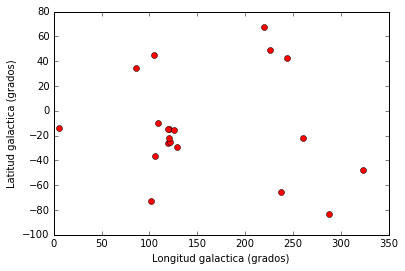

In [15]:
# Complete el código

for i in range(len(grupolocal)):
    if (grupolocal.iloc[i]['tipo'] == 'dSph') and (grupolocal.iloc[i]['desc']<2000) :
        plt.plot(grupolocal.iloc[i]['l'],grupolocal.iloc[i]['b'],'ro')
        
plt.xlabel('Longitud galactica (grados)')
plt.ylabel('Latitud galactica (grados)')

**C)** ¿Las galaxias están distribuidas uniformemente o existen acumulaciones en alguna región del gráfico? ¿Por qué? Relacione esto con el histograma de distancias de más arriba y la materia vista en clase. ¿Hay diferencia alguna si cambia el límite del año de descubrimiento?

**Respuesta:** Existe una aglomeración ligera en longitud = 120 y latitud = -25, que corresponde a la ubicación de Andrómeda. Más galaxias aparecen si cambiamos el límite del año de descubrimiento.

----

## Ejercicio 2
---


En este ejercicio usaremos un catálogo de galaxias y estrellas en la direccion del Cúmulo de galaxias de Coma. Deberemos leer el catalogo, luego identificar los objetos que son galaxias, para hacer un histograma de las velocidades radiales. y finalmente calcularemos algunas cantidades.

Partamos leyendo el catálogo del cúmulo de Coma usando *pandas*. Ejecute el siguiente bloque de código para cargar el catálogo.

In [16]:
cat_url='https://raw.githubusercontent.com/rpmunoz/PentaUC/master/Astronomia%20era%20informacion/data/catalogo_SDSS_cumulo_de_coma.csv'
cat_coma=pd.read_csv(cat_url,header=0,sep=',')
cat_coma.head()

,ra,dec,u,g,r,i,z,redshift,velocidad,distancia_arcmin,tipo
0,194.572522,28.040079,19.563,17.513,16.804,16.450,16.170,0.02065,6195.0,20.4642,galaxia
1,194.575458,28.070532,21.431,18.459,17.351,16.886,16.544,0.15735,47205.0,20.7079,galaxia
2,194.582202,28.094842,24.929,17.628,17.224,17.146,17.737,0.02392,7176.0,20.7955,galaxia
3,194.586585,27.998776,18.394,17.300,16.931,16.819,16.789,NaN,NaN,19.4397,estrella
4,194.590439,28.148753,17.485,15.466,14.668,14.287,14.065,0.02628,7884.0,21.6830,galaxia


**Parte 1**

En el siguiente bloque debera graficar la posición en el cielo de todos los objetos del catálogo. Usaremos las columnas 'ra' y 'dec' del catálogo cat_coma para graficar las posiciones. **Su respuesta será completar donde aparecen los tres puntos ...**

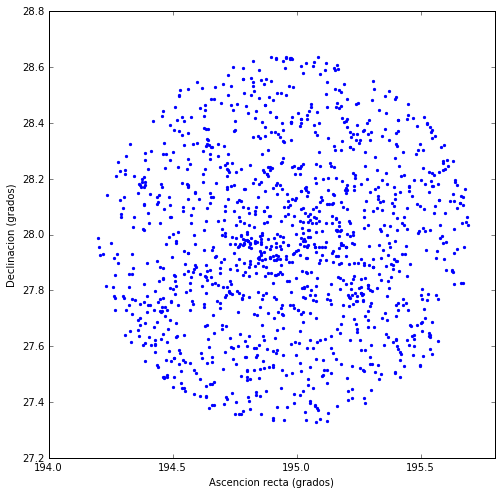

In [17]:
# Complete el código

fig = plt.figure(figsize=(8,8))
plt.scatter(cat_coma['ra'],cat_coma['dec'], marker='.', s=20, color='b' )
plt.xlabel('Ascencion recta (grados)')
plt.ylabel('Declinacion (grados)')

**Parte 2**

El gráfico anterior corresponde a todos los objetos en la direccion del Cúmulo de Coma e incluye tanto a estrellas de nuestra galaxia como galaxias más lejanas que el cúmulo. Usaremos la columna 'tipo' del catalogo y buscaremos objetos cuyo valor sea igual a 'galaxia' para identificar a éstas. Luego haremos el mismo gráfico que hicimos en el bloque anterior. **Su respuesta será completar donde aparecen los tres puntos ...**

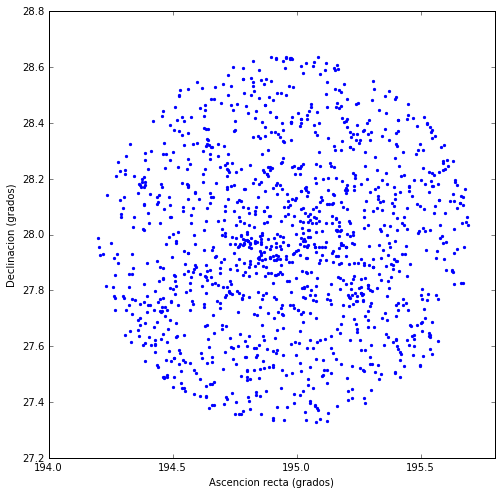

In [18]:
# Complete el código

cat_galaxias=cat_coma[cat_coma['tipo']=="galaxia"]
fig = plt.figure(figsize=(8,8))
plt.scatter(cat_coma['ra'],cat_coma['dec'], marker='.', s=20, color='b' )
plt.xlabel('Ascencion recta (grados)')
plt.ylabel('Declinacion (grados)')

**Parte 3**

Una vez ya identificadas las galaxias, ahora procederemos a estudiar la distribucion de velocidades de las galaxias en el cumulo de galaxias de Coma. Lo primero es hacer un histograma de la columna 'velocidad' de las galaxias en el catalogo. Ejecute el primer bloque y responda la pregunta **A)** que aparece en el segundo bloque

ValueError: max must be larger than min in range parameter.

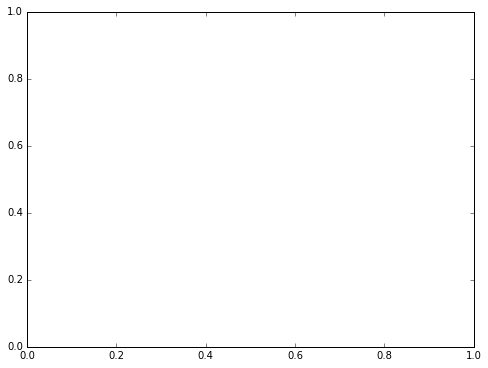

In [19]:
fig = plt.figure(figsize=(8,6))
plt.hist(cat_galaxias['velocidad'], bins=40)

**A)** ¿Pudieron hacer el grafico con el histograma de las velocidades o hubo algun error segun Python?

En caso que haya fallado la creacion del histograma de velocidades ¿Cual cree que fue la razon?. Ejecute el siguiente comando para ver los primeros 50 valores de 'velocidad'

In [22]:
print np.array(cat_galaxias['velocidad'])[0:50]

[  6195.  47205.   7176.   7884.   6015.   6681.   8208.   7152.   7287.
   5709.   6810.   8049.   8877.   7086.  45675.   6705.   6078.   7470.
  49953.   6072.   7014.   7089.   8325.     nan   8025.   9423.   7935.
   8067.   7671.     nan     nan     nan     nan     nan   7215.     nan
   8601.   6897.     nan     nan     nan     nan   7815.   7440.     nan
   4824.  47520.  47850.     nan   7239.]


**Respuesta:** Existen valores que no son números: *nan*, del inglés *not a number* (no es un número)

**Parte 4**

Una manera de verificar que solo tenemos numeros en la comuna 'velocidad' de la tabla es usar la funcion *isfinite* de *numpy* para verificar que los valores son numeros finitos. El siguiente codigo revisa una por una la velocidad de las galaxias en el catalogo e indica *True* si la velocidad es finita y *False* si no esta definida.

In [24]:
np.isfinite(cat_galaxias['velocidad'])

0        True
1        True
2        True
4        True
5        True
6        True
7        True
10       True
11       True
12       True
15       True
18       True
19       True
22       True
23       True
25       True
26       True
27       True
28       True
32       True
35       True
36       True
41       True
42      False
44       True
45       True
46       True
48       True
50       True
52      False
        ...  
1237     True
1239     True
1255     True
1257     True
1266     True
1268     True
1270     True
1271     True
1272     True
1273    False
1274     True
1276     True
1277     True
1279     True
1280     True
1282     True
1286     True
1287     True
1289    False
1291    False
1292     True
1293     True
1295     True
1297     True
1298    False
1300     True
1301     True
1305     True
1309     True
1312     True
Name: velocidad, dtype: bool

Una manera de resolver este problema es usar solamente las galaxias que tengan velocidades finitas y con valores mayores a 0 km/s. Ademas, usaremos solamente galaxias con velocidad inferior a 20.0000 km/s pues no queremos analizar galaxias que se alejan a gran velocidad. Ejecute el siguiente codigo para definir la variable galaxias_velocidad para identificar los objetos que son galaxias y que tienen velocidades mayores a 0. Imprimiremos las velocidades de las galaxias que cumplen la condicion *galaxias_velocidad* y deberiamos obtener *True* para todas

In [25]:
galaxias_velocidad=cat_coma[((cat_coma['tipo']=='galaxia') & (cat_coma['velocidad']>0.) & (cat_coma['velocidad']<20000.))]
np.isfinite(galaxias_velocidad['velocidad'])

0       True
2       True
4       True
5       True
6       True
7       True
10      True
11      True
12      True
15      True
18      True
19      True
22      True
25      True
26      True
27      True
32      True
35      True
36      True
41      True
44      True
45      True
46      True
48      True
50      True
58      True
61      True
62      True
70      True
71      True
        ... 
1147    True
1163    True
1167    True
1168    True
1173    True
1177    True
1179    True
1181    True
1192    True
1198    True
1200    True
1209    True
1215    True
1226    True
1257    True
1266    True
1270    True
1271    True
1272    True
1274    True
1282    True
1286    True
1287    True
1292    True
1295    True
1297    True
1300    True
1305    True
1309    True
1312    True
Name: velocidad, dtype: bool

**B)** En el siguiente bloque debera hacer un histograma de las velocidades de galaxias que cumplen el criterio *galaxias_velocidad*. **Su respuesta será completar donde aparecen los tres puntos ...**

(array([  2.,   2.,   8.,  13.,  23.,  43.,  38.,  44.,  63.,  52.,  38.,
         27.,  14.,   3.,   5.,   4.,   1.,   1.,   1.,   0.,   0.,   0.,
          0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   2.,   1.,   0.,   1.]),
 array([  3723.  ,   4121.55,   4520.1 ,   4918.65,   5317.2 ,   5715.75,
          6114.3 ,   6512.85,   6911.4 ,   7309.95,   7708.5 ,   8107.05,
          8505.6 ,   8904.15,   9302.7 ,   9701.25,  10099.8 ,  10498.35,
         10896.9 ,  11295.45,  11694.  ,  12092.55,  12491.1 ,  12889.65,
         13288.2 ,  13686.75,  14085.3 ,  14483.85,  14882.4 ,  15280.95,
         15679.5 ,  16078.05,  16476.6 ,  16875.15,  17273.7 ,  17672.25,
         18070.8 ,  18469.35,  18867.9 ,  19266.45,  19665.  ]),
 <a list of 40 Patch objects>)

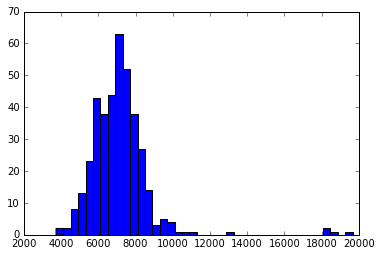

In [26]:
# Complete el código

plt.hist(galaxias_velocidad['velocidad'], bins=40)

**Parte 5**

En base al histograma de las velocidades de galaxias que cumplen el criterio *galaxias_velocidad* (pregunta 4), responda

**C)** ¿En torno a qué valor de velocidad se concentran las galaxias? ¿En qué rango de valores de velocidad usted diria que se encuentran las galaxias del cumulo de Coma? Escriba su respuesta a continuación,

**Respuesta:** Vemos que las velocidades están mayormente entre 4000 y 11000 km/s, todo alrededor de cerca de 7000 km/s.


**D)** Calcule la velocidad promedio de las galaxias que cumplen la condicion galaxias_velocidad. Puede usar la funcion mean de *numpy* o los ciclos FOR que vieron en el taller con Simon. 

In [30]:
mean = np.mean(galaxias_velocidad['velocidad'])
print mean

7124.9379845


¿Cual es el valor del promedio? ¿Como se compara con el valor que pusieron en la parte A?  Escriba su respuesta a continuacion,

**Respuesta:** 7124.9 km/s, muy cercano al valor "al ojo" 8-)

**E)** Calcule la desviación estándar de la velocidad de las galaxias que cumplen la condicion *galaxias_velocidad*. Puede usar la funcion std de *numpy* o los ciclos FOR que vieron en el taller con Simon.

In [33]:
std = np.std(galaxias_velocidad['velocidad'])
print std
print mean-2*std, mean+2*std

1671.27414028
3782.38970394 10467.4862651


**F)** ¿Cual es el valor de la desviación estándar de la velocidad? ¿Como se compara con el rango de valores que escribieron en la parte A? Escriba su respuesta a continuacion,

**Respuesta:** El valor de la desviación estándar es 1671.3 km/s aproximadamente, y vemos que los valores "al ojo" de arriba corresponden más o menos al promedio más (o menos) 2 veces la desviación estándar. A ver si les suena a algo que vieron (o verán) en el colegio

---
## Ejercicio 3
---

En este ejercicio usted deberá identificar al menos 4 galaxias falsas que nosotros introdujimos a mano en el catálogo del grupo local. Para esto, haga histogramas, gráficos 2D, y gráficos con escala de color de las cantidades relevantes, y compárelos con los análogos a estos del catálogo original. Cargaremos ambos catálogos en la siguiente celda.

In [42]:
cat_url='https://raw.githubusercontent.com/rpmunoz/PentaUC/master/Astronomia%20era%20informacion/data/catalogo_grupo_local.csv'
grupolocal=pd.read_csv(cat_url,header=0,sep=',')

cat_url_fake='https://raw.githubusercontent.com/rpmunoz/PentaUC/master/Astronomia%20era%20informacion/data/catalogo_grupo_local_fake.csv'
grupolocal_fake=pd.read_csv(cat_url_fake,header=0,sep=',')
grupolocal_fake.head()

,nombre,l,b,distancia,diametro,tipo,desc
0,Via Lactea,0.0,0.0,0.00,27.59,SBbc,0
1,Sagittarius Dwarf,5.6,-14.1,23.91,6.13,dSph,1994
2,Ursa Major II,152.5,37.4,30.66,0.31,dSph,2006
3,Coma Berenices Dwarf,241.9,83.6,44.15,0.31,dSph,2006
4,Gran nube de Magallanes,280.5,-32.9,50.59,7.67,SBm,0


Debajo hay espacio para que ud. desarrolle sus propios códigos y muestre los gráficos con los que encontró a las galaxias entrometidas. En cada gráfico tendrá que incluir un comentario (recuerde: con "#") donde nos diga cómo encontró al intruso

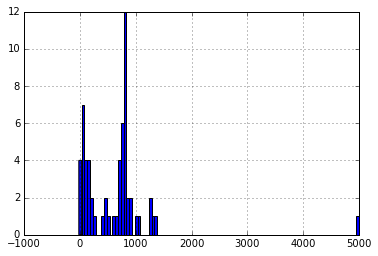

In [39]:
grupolocal_fake['distancia'].hist(bins=100)
#distancia MUY grande

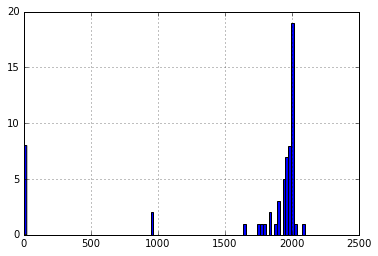

In [40]:
grupolocal_fake['desc'].hist(bins=100)
#año de descubrimiento mayor al año actual

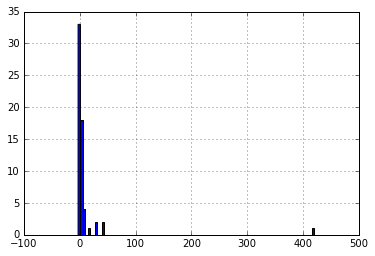

In [43]:
grupolocal_fake['diametro'].hist(bins=100)
#galaxia enorme

In [48]:
for d in grupolocal_fake['diametro']:
    print d
# diámetro negativo

27.59
6.13
0.31
0.31
7.67
6.0
4.6
0.61
0.61
0.92
0.61
0.92
0.92
0.61
1.53
1.23
27.59
0.61
0.61
0.92
1.84
0.92
0.61
0.61
2.45
0.89
2.45
0.92
1.23
3.07
1.53
3.07
0.92
0.61
0.92
1.23
0.61
0.61
0.61
420.0
42.92
0.61
0.62
0.61
0.61
0.92
2.45
4.6
2.45
16.86
0.61
1.84
3.07
-3.0
0.92
0.92
0.92
7.67
3.07
42.92
2.45


In [ ]:
# Aquí va su codigo

Responda las siguientes preguntas

**A)** Una vez que sepa las condiciones que hace que una galaxia sea un intruso, modifique el código de abajo para obtener su 
nombre.

In [50]:
# Complete el código
for i in range(len(grupolocal_fake)):
    if (grupolocal_fake.iloc[i]['diametro'] < 0) | (grupolocal_fake.iloc[i]['diametro'] > 400) | (grupolocal_fake.iloc[i]['desc'] > 2010) | (grupolocal_fake.iloc[i]['distancia'] < 0) | (grupolocal_fake.iloc[i]['distancia']  > 2000) :
        print grupolocal_fake.iloc[i]['nombre']

Mediana nube de Magallanes
New Via Lactea
The biggest  Andromeda ever
Andromeda XIV
Taurus Dwarf


**B)** ¿Cuáles son los nombres de las galaxias ficticias?

**Respuesta** OJO, estas no son todas ;-)
   - Mediana nube de Magallanes
   - New Via Lactea
   - The biggest  Andromeda ever
   - Andromeda XIV
   - Taurus Dwarf

# Una vez terminada la sesion del taller, debera ejecutar las siguientes dos celdas para subir su trabajo al servidor donde quedara almacenada

In [ ]:
%%javascript
var kernel = IPython.notebook.kernel;
var thename = window.document.getElementById("notebook_name").innerHTML;
var command = "notebook_file = " + "'"+thename+"'";
kernel.execute(command);

In [ ]:
from IPython.display import display,Javascript,HTML
import dropbox
import socket
import string

# Get the hostname
hostname=string.split(socket.gethostname(),'.')[0]

# Save the notebook
display(Javascript('IPython.notebook.save_checkpoint();'))

try:
    integrante_exist= (integrante1 != '' and integrante2!= '')
except NameError:
    display(HTML("<big><b><br>Los nombres de los integrantes no estan definidos. Revise la primera celda y escriba los nombres.</b></big>"))
else:
    if integrante_exist:
        output_file='/'+notebook_file+'_'+hostname+'_'+integrante1+'_'+integrante2+'.ipynb'
        
        display(HTML("<big><b><br>Nombres de los integrantes:</b></big>"))
        display(HTML("<big>{}<br>{}</big>".format(integrante1,integrante2)))
        display(HTML("<big><b><br>Nombre del archivo:</b></big>"))
        display(HTML("<big>{}</big>".format(output_file)))

        client=dropbox.client.DropboxClient('q96bL4l9oyAAAAAAAAAACEK7gCFwoO-PtZu5jJ6gynNwriiBjzTLsN0eV51YQhNe')

        f = open(notebook_file+'.ipynb', 'rb')
        response = client.put_file(output_file,f)
        f.close()
        display(HTML("<big><b><br>Registro del servidor de Dropbox:</b></big>"))
        print response
    else:
        display(HTML("<big><b><br>Los nombres de los integrantes no estan definidos. Revise la primera celda y escriba los nombres.</b></big>"))